In [1]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_data = pd.read_csv('used_car_train_20200313.zip', sep=' ')
test_data = pd.read_csv('used_car_testB_20200421.zip', sep=' ')

print(f'train data shape: {train_data.shape}')
print(f'test data shape: {test_data.shape}')

train data shape: (150000, 31)
test data shape: (50000, 30)


## 1. Exploratory Data Analysis
- I referenced the notebook in Tianchi, ['Task2'](https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.3.1cd837c9giLdfj&postId=95457)

In [3]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [4]:
test_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [5]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


**feature type and missing value check**
- features:'model', 'bodyType', 'fuelType' and 'gearbox', have some missing values.
- we may impute the missing values or leave them for tree-based models as they can learn the missing-value patterns.

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

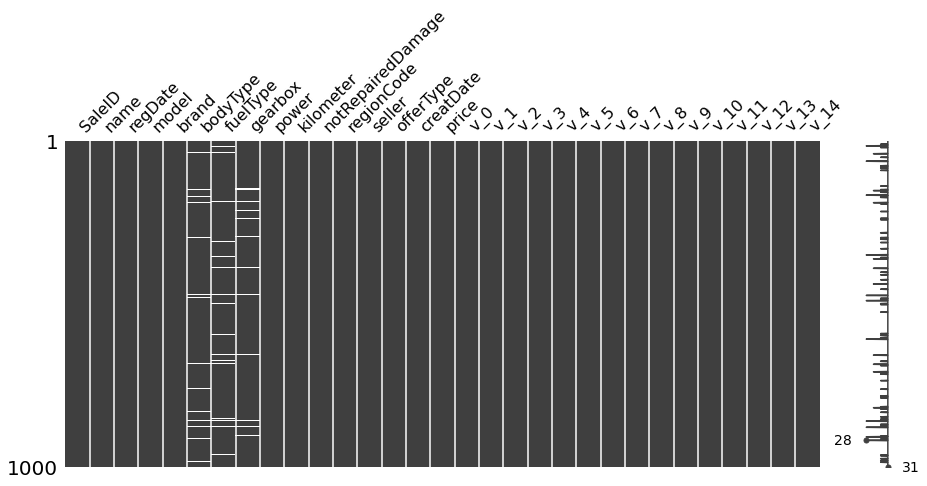

In [7]:
_ = msno.matrix(train_data.sample(1000),figsize=(15, 6))

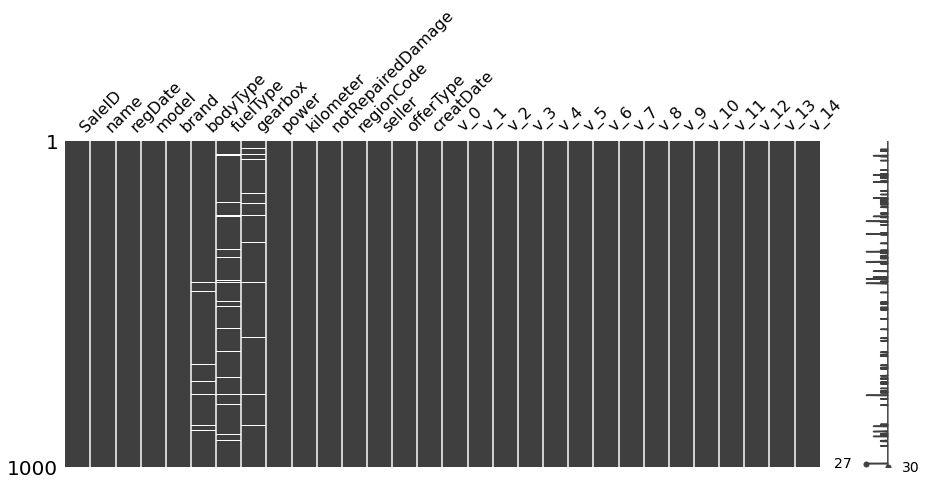

In [8]:
_ = msno.matrix(test_data.sample(1000), figsize=(15, 6))

In [9]:
train_data.nunique()

SaleID               150000
name                  99662
regDate                3894
model                   248
brand                    40
bodyType                  8
fuelType                  7
gearbox                   2
power                   566
kilometer                13
notRepairedDamage         3
regionCode             7905
seller                    2
offerType                 1
creatDate                96
price                  3763
v_0                  143997
v_1                  143998
v_2                  143997
v_3                  143998
v_4                  143998
v_5                  139624
v_6                  109766
v_7                  138709
v_8                  142451
v_9                  140617
v_10                 143997
v_11                 143997
v_12                 143997
v_13                 143998
v_14                 143998
dtype: int64

In [10]:
# process the notRepariedDamage feature which has unreasonable value, and mark it down as 'NaN' value
train_data.notRepairedDamage.value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [11]:
train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [12]:
test_data.notRepairedDamage.value_counts()

0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64

In [13]:
test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [14]:
# two features, 'seller' and 'offerType', are useless
# and they will be deleted in the modeling stage
train_data.seller.value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [15]:
train_data.offerType.value_counts()

0    150000
Name: offerType, dtype: int64

**analyze numerical and categorical features**

***1. Numerical features***
  - the price has strong correlation with kilometer, v_0, v_3, v_8 and v_12
  - some features are also highly correlated, e.g. v_3 and v_12, such that we may only keep either one as input into the models.

In [16]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']

Text(0.5, 1.0, 'correlation among numerical features and target')

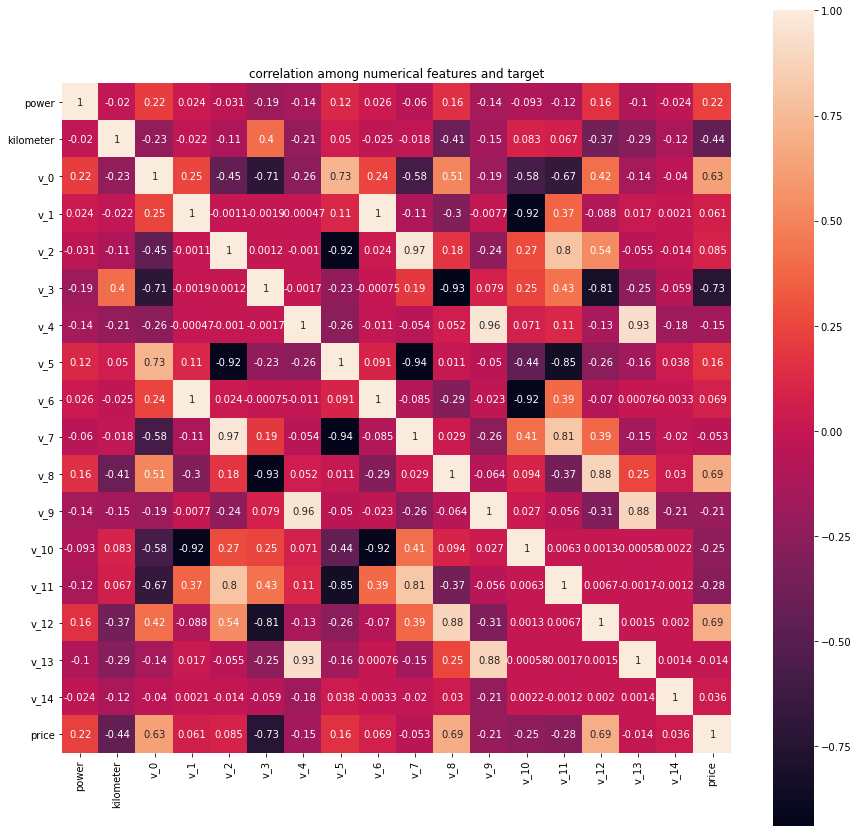

In [17]:
# 1. numerical features correlation analysis
correlation_numeric = train_data.loc[:, numeric_features + ['price']].corr()

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(correlation_numeric, square=True, annot=True)
ax.set_title('correlation among numerical features and target')

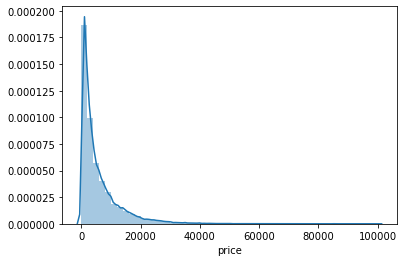

In [18]:
# analyze the target variable, 'price'
# the target variable is highly left-skewed, such that some transformation may be needed.
ax = sns.distplot(train_data.price)

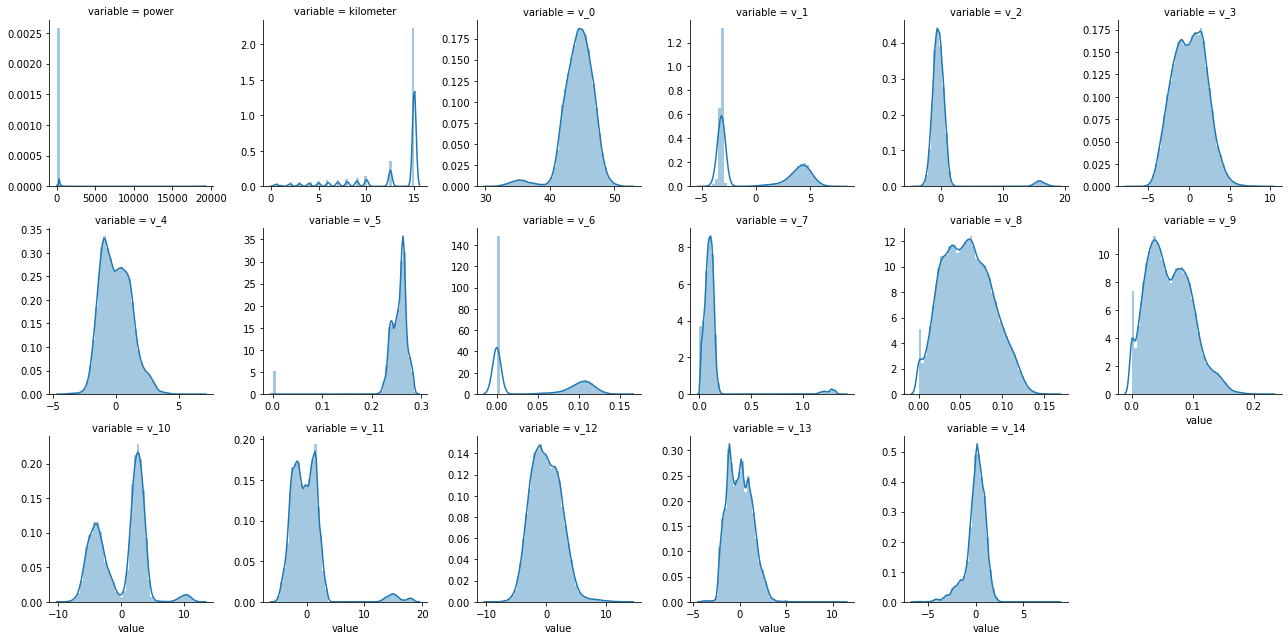

In [19]:
# check the distribution for each numerical feature
# the 'power' variable has some values more than 600 which should be clipped
f = pd.melt(train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable", col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

***2.categorical features***

In [20]:
train_data.loc[:, categorical_features].nunique()

name                 99662
model                  248
brand                   40
bodyType                 8
fuelType                 7
gearbox                  2
notRepairedDamage        2
regionCode            7905
dtype: int64

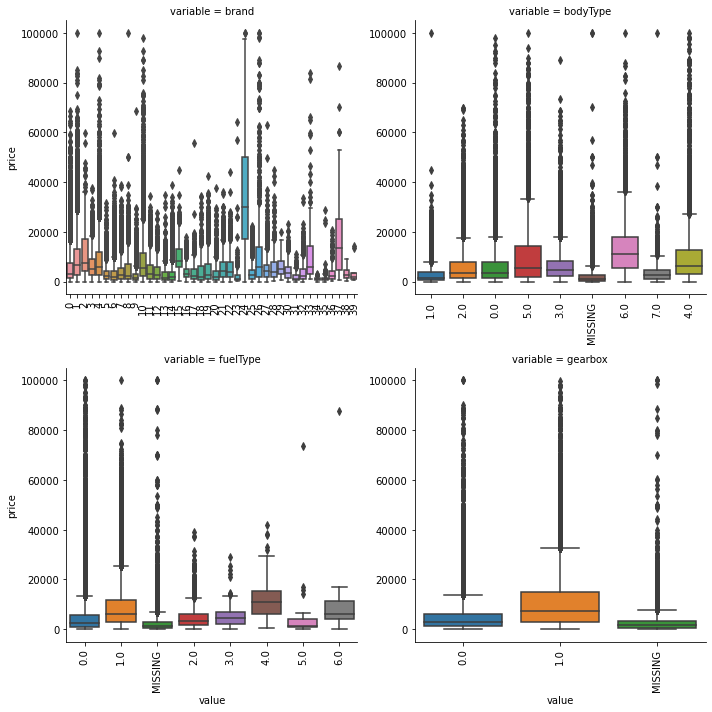

In [21]:
## plot the box_plot for some categorical features to see if they good predictors for the price target
categorical_features_plot =  ['brand',
 'bodyType',
 'fuelType',
 'gearbox']

plot_data = train_data.copy()
for c in categorical_features_plot:
    plot_data[c] = plot_data[c].astype('category')
    if plot_data[c].isnull().any():
        plot_data[c] = plot_data[c].cat.add_categories(['MISSING'])
        plot_data[c] = plot_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(plot_data, id_vars=['price'], value_vars=categorical_features_plot)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

## 2. Feature Engineering/Selection

In [22]:
##2.1. creat new features for days and years the car owned.
train_data['used_days'] = (pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

test_data['used_days'] = (pd.to_datetime(test_data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(test_data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

train_data['used_year'] = train_data['used_days'] / 365

test_data['used_year'] = test_data['used_days'] / 365

Text(0.5, 1.0, 'power distribution')

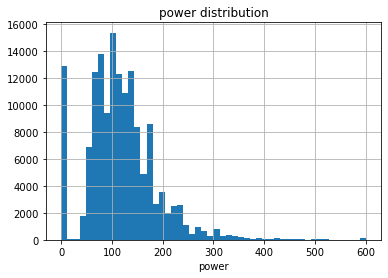

In [23]:
##2.2. build some discrete features from numeric ones using bins.
train_data['power'] = np.clip(train_data.power, 0, 600)
test_data['power'] = np.clip(test_data.power, 0, 600)

ax = train_data.power.hist(bins=50)
ax.set_xlabel('power')
ax.set_title('power distribution')

In [24]:
power_bin = [i*10 for i in range(31)]
train_data['power_bin'] = pd.cut(train_data.power, bins=power_bin, labels=False)
test_data['power_bin'] = pd.cut(test_data.power, bins=power_bin, labels=False)

Text(0.5, 1.0, 'model distribution')

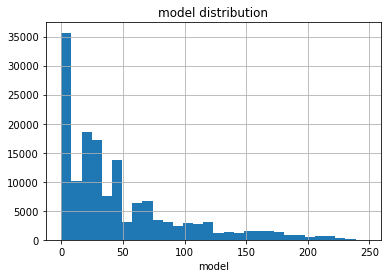

In [25]:
ax = train_data.model.hist(bins=30)
ax.set_xlabel('model')
ax.set_title('model distribution')

In [26]:
model_bin = [i*10 for i in range(14)]
train_data['model_bin'] = pd.cut(train_data.model, bins=model_bin, labels=False)
test_data['model_bin'] = pd.cut(test_data.power, bins=model_bin, labels=False)

In [27]:
##2.3. build some cross-interaction features
def cross_interaction(train_data, cat_feature, num_feature, test_data):
    column_name = {'max':cat_feature+'_'+num_feature+'_max', 
              'median':cat_feature+'_'+num_feature+'_median', 
              'min':cat_feature+'_'+num_feature+'_min', 
              'sum':cat_feature+'_'+num_feature+'_sum', 
              'std':cat_feature+'_'+num_feature+'_std', 
              'mean':cat_feature+'_'+num_feature+'_mean'}
    cros_feature = train_data.groupby(cat_feature)[num_feature].agg(['max', 'median', 'min', 'sum', 'std', 'mean'])\
                                                            .reset_index().rename(columns=column_name)
    train_data = train_data.merge(cros_feature, how='left', on=cat_feature)
    test_data = test_data.merge(cros_feature, how='left', on=cat_feature)
    
    return train_data, test_data
    
train_data, test_data = cross_interaction(train_data, 'brand', 'price', test_data)
train_data, test_data = cross_interaction(train_data, 'bodyType', 'price', test_data)


In [28]:
## 2.4. drop non-significant features
features_to_drop = ['name', 'regDate', 'regionCode', 'seller', 'offerType', 'creatDate']

train_data = train_data.drop(columns=features_to_drop)
test_data = test_data.drop(columns=features_to_drop)

In [29]:
## 2.5 transfer the target variable
from sklearn.preprocessing import PowerTransformer
power_trans = PowerTransformer(method='box-cox')
train_data['price_trasfer'] = power_trans.fit_transform(train_data.loc[:,['price']])

Text(0.5, 1.0, 'transfered price variable')

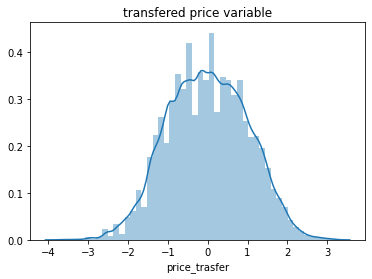

In [30]:
ax = sns.distplot(train_data.price_trasfer)
ax.set_title('transfered price variable')

## 3. Modeling
- additional analyses will be performed in the future to imporve predictive performance

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
import xgboost as xgb 

In [32]:
train_data.notRepairedDamage = train_data.notRepairedDamage.astype(float)
test_data.notRepairedDamage = test_data.notRepairedDamage.astype(float)

xgb_model = xgb.XGBRegressor()
scores = cross_val_score(xgb_model, X=train_data.drop(columns=['SaleID', 'price', 'price_trasfer']), y=train_data.price, cv=5, scoring=make_scorer(mean_absolute_error))
print(scores)

[647.38214332 651.06640634 664.93641642 650.43090226 655.17520368]


In [33]:
xgb_model = xgb.XGBRFRegressor()
xgb_model.fit(X=train_data.drop(columns=['SaleID', 'price', 'price_trasfer']), y=train_data.price)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
pred_price = xgb_model.predict(data=test_data.drop(columns='SaleID'))

In [37]:
prediction_price = test_data.loc[:, ['SaleID']]
prediction_price['price'] = pred_price

In [ ]:
prediction_price.to_csv('used_car_testB_submit.csv', index=False)